In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
full = pd.read_csv('percentage.csv', index_col=0, header=[0] ,parse_dates=True)
full.head()

,BAA10YM,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,PAYEMS,PCE,...,T10YFFM,UMCSENT,UNRATE,USSLIND,A191RL1Q225SBEA,A191RO1Q156NBEA,GDPC1,GFDEGDQ188S,GPDI,PCEC
DATE,,,,,,,,,,,,,,,,,,,,,
1919-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# these two are duplicate of GDPC1
full.drop(columns=['A191RL1Q225SBEA', 'A191RO1Q156NBEA'], inplace=True)

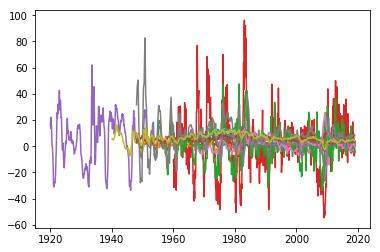

In [12]:
plt.plot(full)

In [13]:
# if we slice at 1960, how many series are NaN?
slice = full.loc["1960-01-01"].isna()
slice.value_counts()

False    15
True      4
Name: 1960-01-01 00:00:00, dtype: int64

In [14]:
non_nan = []

for i, v in slice.items():
    if v == False:
        non_nan.append(i)
        
non_nan

['BAA10YM',
 'CPIAUCSL',
 'FEDFUNDS',
 'HOUST',
 'INDPRO',
 'INTDSRUSM193N',
 'M2SL',
 'PAYEMS',
 'PCE',
 'T10YFFM',
 'UMCSENT',
 'UNRATE',
 'GDPC1',
 'GPDI',
 'PCEC']

In [19]:
# drop columns which are nan
start_1960 = full[non_nan].loc["1960-01-01":]
start_1960.head()

,BAA10YM,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,M2SL,PAYEMS,PCE,T10YFFM,UMCSENT,UNRATE,GDPC1,GPDI,PCEC
DATE,,,,,,,,,,,,,,,
1960-01-01,0.62,1.240951,3.99,-11.888956,10.036685,4.0,4.047453,3.422387,5.717086,0.73,3.303965,5.2,4.927103,16.004136,5.466167
1960-02-01,0.85,1.413793,3.97,-9.838032,6.962862,4.0,3.753910,3.463787,5.071059,0.52,10.132159,4.8,3.956550,9.516528,5.408052
1960-03-01,1.00,1.518813,3.84,-31.543210,4.497359,4.0,3.526971,2.716264,5.596418,0.41,10.132159,5.4,3.000380,3.336795,5.350685
1960-04-01,0.92,1.932367,3.92,-18.930818,1.506345,4.0,3.447087,2.798147,7.783472,0.36,10.132159,5.2,2.058276,-2.556472,5.294052
1960-05-01,0.93,1.825069,3.85,-15.153538,-0.114185,4.0,2.977413,1.727358,4.397343,0.50,-2.098636,5.1,2.200469,-0.685678,4.707928


In [20]:
start_1960.shape

(709, 15)

In [21]:
# check if there is is null
for series in start_1960:
    col = start_1960[series]
    if col.isna().value_counts().loc[False] < start_1960.shape[0]:
        print(series)
        print(col.isna().value_counts().loc[True])
    

INTDSRUSM193N
21


In [22]:
# TODO drop this one for now
start_1960.drop(columns='INTDSRUSM193N', inplace=True)

In [23]:
from statsmodels.tsa.vector_ar.var_model import VAR
# note will throw exception if there is missing data

In [29]:
model = VAR(start_1960, freq='MS')
results = model.fit(maxlags=3)

In [30]:
results.summary()
# As can be seen, the number of parameters gets out of hand fast.
# We need a more parsimonious version

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Jul, 2019
Time:                     15:58:22
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                   -17.0147
Nobs:                     706.000    HQIC:                  -19.4003
Log likelihood:          -6044.17    FPE:                8.37591e-10
AIC:                     -20.9026    Det(Omega_mle):     3.66060e-10
--------------------------------------------------------------------
Results for equation BAA10YM
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.158772         0.052502            3.024           0.002
L1.BAA10YM          1.313774         0.053306           24.646           0.000
L1.CPIAUCSL         0.011221         0.020763            0.540    

In [31]:
import utils

In [77]:
def plot_forecast_custom(results, steps, previous = 20, alpha=0.05, plot_stderr=True):
    mid, lower, upper = results.forecast_interval(results.y, steps=12, alpha=0.05)
    fig = utils.plot_var_forc(results.y[-previous:], mid, lower, upper, names=results.names, plot_stderr=plot_stderr)
    return fig


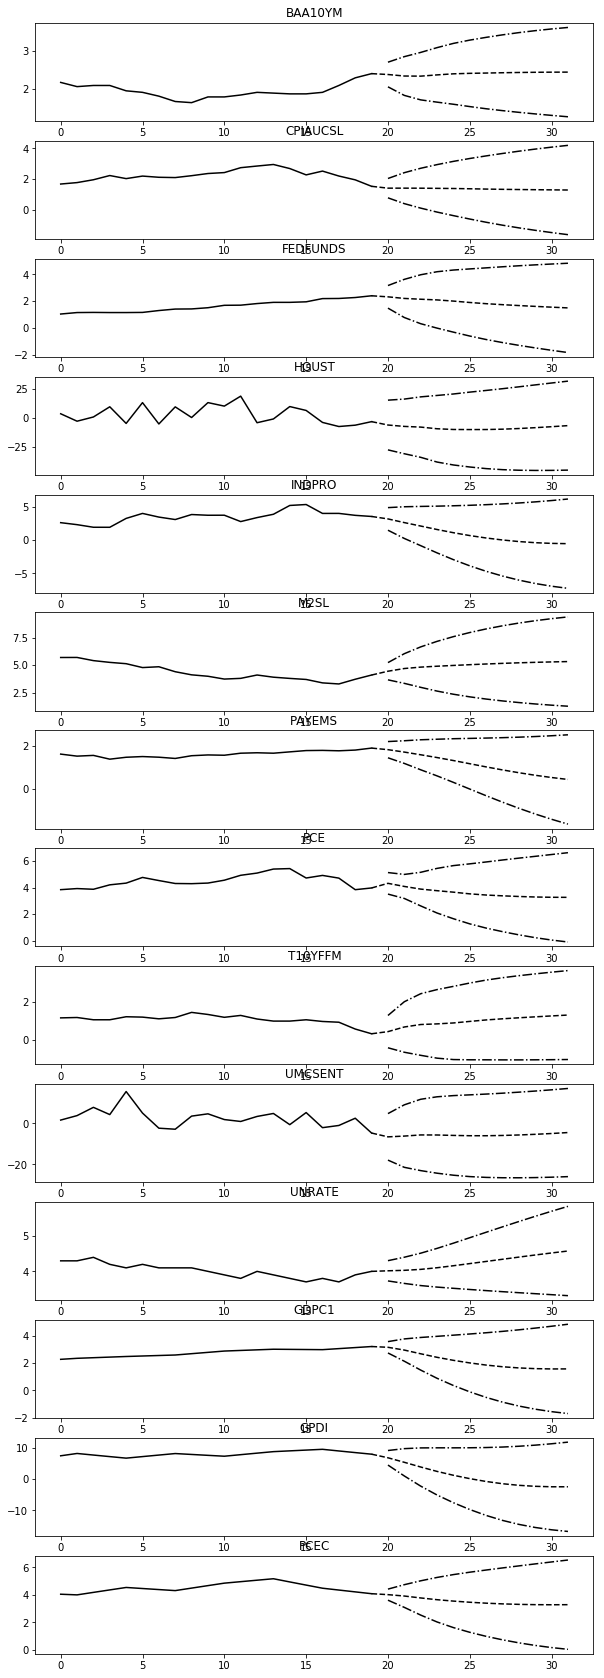

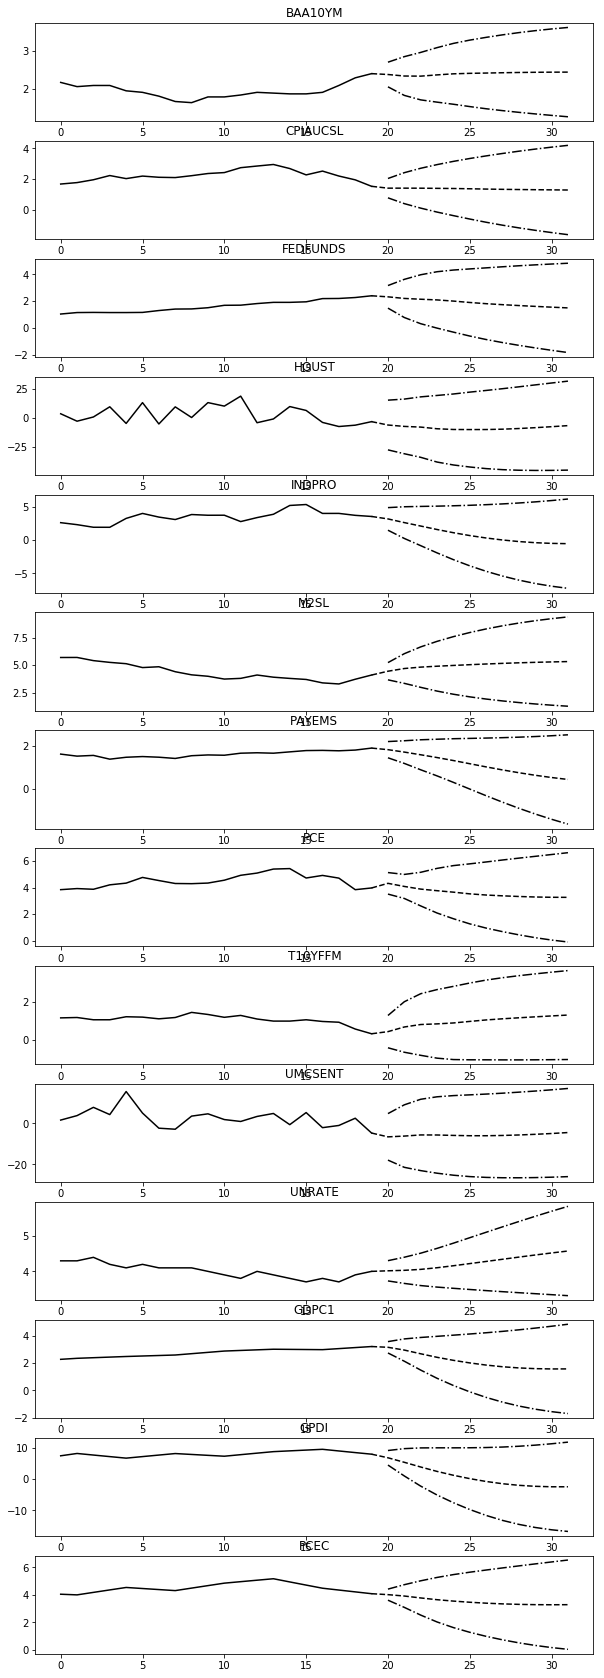

In [71]:
plot_forecast_custom(results, steps = 12)

In [65]:
# what if we just tried it with the key endog?

endog = start_1960.loc[:, ["GDPC1", "UNRATE", "CPIAUCSL"]]
exog = start_1960.drop(columns=["GDPC1", "UNRATE", "CPIAUCSL"])

parsimonious = VAR(endog, 
                   exog,
                   freq='MS')

par_results = parsimonious.fit(maxlags=6)

In [66]:
par_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Jul, 2019
Time:                     16:49:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -8.61360
Nobs:                     703.000    HQIC:                  -8.97139
Log likelihood:           330.129    FPE:                0.000101380
AIC:                     -9.19679    Det(Omega_mle):     8.94352e-05
--------------------------------------------------------------------
Results for equation GDPC1
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.260979         0.058388            4.470           0.000
exog0              -0.072597         0.015566           -4.664           0.000
exog1               0.005229         0.004671            1.119      

In [80]:
par_results.forecast(par_results.y, exog_future=exog, steps=12)
# need to provide exog_future as our system does not forecast these
# pointless as cannot obtain them

ValueError: all the input array dimensions except for the concatenation axis must match exactly